# Analysis of 24 hour licenced venues vs crime

This analysis uses the transformed datasets output from data exploration

In [2]:
try:
    print("Importing libraries...\n")
    from progressbar import ProgressBar
    from bs4 import BeautifulSoup as bts # library for web scraping
    import numpy as np # library to handle data in a vectorized manner
    import pandas as pd # library for data analysis
    from pandas.io.json import json_normalize
    import matplotlib.cm as cm
    import matplotlib.colors as colors
    import requests # library to handle requests
    from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
    import matplotlib as mp # library for visualization
    from sklearn.cluster import KMeans # import k-means from clustering stage
    from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
    import folium # map rendering library
    import lxml
    import re
    
    from time import sleep
    
    from matplotlib import pyplot as plt
    from matplotlib.pyplot import figure
    import seaborn as sn
    
    import datetime
    import dateutil
    print("All libraries imported successfully!\n")
except:
    print("ERROR: Could not import all libraries!\n")

%matplotlib inline

Importing libraries...

All libraries imported successfully!



# Retrieve Transformed Datasets

Obtain transformed licenced venue datasets, set index to borough

In [3]:
adjAllNightLicense=pd.read_csv('PopAdj24hourLicense.csv')
allNightLicense= pd.read_csv('24hourLicense.csv')

adjAllNightLicense.set_index('Borough', inplace=True)
allNightLicense.set_index('Borough', inplace=True)


adjAllNightLicense.head()

,Total,Total Supermarkets and stores,Large supermarkets,Other convenience stores,Total Hotel bars,Open 24 hours to residents and their guests only
Borough,,,,,,
Barking and Dagenham,0.143541,0.143541,0.047847,0.095694,0.000000,0.000000
Barnet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bexley,0.163733,0.163733,0.040933,0.122800,0.000000,0.000000
Brent,1.385125,0.843120,0.120446,0.722674,0.090334,0.000000
Bromley,0.426959,0.335468,0.121988,0.213480,0.091491,0.091491


In [4]:
allNightLicense.head()

,Total,Total Supermarkets and stores,Large supermarkets,Other convenience stores,Total Hotel bars,Open 24 hours to residents and their guests only
Borough,,,,,,
Barking and Dagenham,3,3,1,2,0,0
Barnet,0,0,0,0,0,0
Bexley,4,4,1,3,0,0
Brent,46,28,4,24,3,0
Bromley,14,11,4,7,3,3


In [6]:
venueCols=allNightLicense.columns

Obtain  transformed crime data sets

In [13]:
adjHistoricCrimeByBoroughMinor = pd.read_csv('PopAdjCrimeHistoricGranularClass.csv')
adjHistoricCrimeByBoroughMajor= pd.read_csv('PopAdjCrimeHistoric.csv')

adjHistoricCrimeByBoroughMinor.set_index('Borough', inplace=True)
adjHistoricCrimeByBoroughMajor.set_index('Borough', inplace=True)


In [14]:
historicCrimeByBoroughMinor= pd.read_csv('CrimeHistoricGranularClass.csv')
historicCrimeByBoroughMajor= pd.read_csv('CrimeHistoric.csv')

historicCrimeByBoroughMinor.set_index('Borough', inplace=True)
historicCrimeByBoroughMajor.set_index('Borough', inplace=True)


# Combine datasets and conduct basic exploration

Population adjusted data will be the focus of analysis, the raw numbers are also retrieved in case during the course of analysis it is decided to revert to these

In [15]:
#let's combine data

MajorCrimeLicense=historicCrimeByBoroughMajor.merge(allNightLicense, left_index= True, right_index=True)
MinorCrimeLicense=historicCrimeByBoroughMinor.merge(allNightLicense, left_index= True, right_index=True)

In [20]:
#let's combine data - population adjusted data

adjMajorCrimeLicense=adjHistoricCrimeByBoroughMajor.merge(adjAllNightLicense, left_index= True, right_index=True)
adjMinorCrimeLicense=adjHistoricCrimeByBoroughMinor.merge(adjAllNightLicense, left_index= True, right_index=True)

Picking three crime categories plot to see if there appears to be a relation between venues serving alcohol and crime

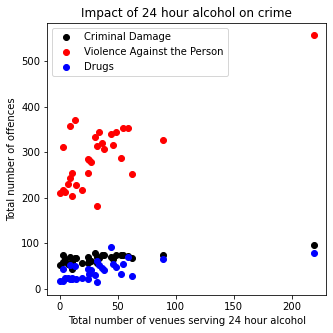

In [57]:

plt.rcParams["figure.figsize"] = (5,5)
plt.plot(MajorCrimeLicense['Total'],MajorCrimeLicense['Criminal Damage'],'o', color='black', label = 'Criminal Damage')
plt.plot(MajorCrimeLicense['Total'],MajorCrimeLicense['Violence Against the Person'],'o', color='red', label='Violence Against the Person')
plt.plot(MajorCrimeLicense['Total'],MajorCrimeLicense['Drugs'],'o', color='blue', label="Drugs")
plt.title("Impact of 24 hour alcohol on crime")
plt.xlabel("Total number of venues serving 24 hour alcohol")
plt.ylabel("Total number of offences")
plt.legend()


Criminal damage looks flat - ie not impacted by venues with 24 hour licence, however violence against the person appear to be correlated.

Next let's consider just Supermarkets and Stores

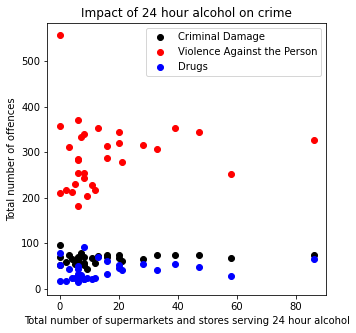

In [58]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(MajorCrimeLicense['Total Supermarkets and stores'],MajorCrimeLicense['Criminal Damage'],'o', color='black', label='Criminal Damage')
plt.plot(MajorCrimeLicense['Total Supermarkets and stores'],MajorCrimeLicense['Violence Against the Person'],'o', color='red', label='Violence Against the Person')
plt.plot(MajorCrimeLicense['Total Supermarkets and stores'],MajorCrimeLicense['Drugs'],'o', color='blue', label='Drugs')
plt.title("Impact of 24 hour alcohol on crime")
plt.xlabel("Total number of supermarkets and stores serving 24 hour alcohol")
plt.ylabel("Total number of offences")
plt.legend()

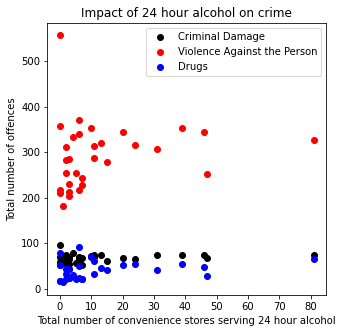

In [59]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(MajorCrimeLicense['Other convenience stores'],MajorCrimeLicense['Criminal Damage'],'o', color='black', label='Criminal Damage')
plt.plot(MajorCrimeLicense['Other convenience stores'],MajorCrimeLicense['Violence Against the Person'],'o', color='red', label='Violence Against the Person')
plt.plot(MajorCrimeLicense['Other convenience stores'],MajorCrimeLicense['Drugs'],'o', color='blue', label='Drugs')
plt.title("Impact of 24 hour alcohol on crime")
plt.xlabel("Total number of convenience stores serving 24 hour alcohol")
plt.ylabel("Total number of offences")
plt.legend()


Let's consider population adjusted

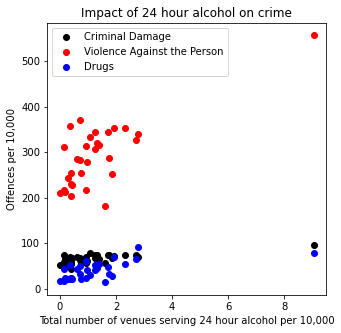

In [60]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(adjMajorCrimeLicense['Total'],adjMajorCrimeLicense['Criminal Damage'],'o', color='black', label='Criminal Damage')
plt.plot(adjMajorCrimeLicense['Total'],adjMajorCrimeLicense['Violence Against the Person'],'o', color='red', label='Violence Against the Person')
plt.plot(adjMajorCrimeLicense['Total'],adjMajorCrimeLicense['Drugs'],'o', color='blue', label='Drugs')
plt.title("Impact of 24 hour alcohol on crime")
plt.xlabel("Total number of venues serving 24 hour alcohol per 10,000")
plt.ylabel("Offences per 10,000")
plt.legend()

Adjusting for population makes it look more like there is a positive correlation for drugs offences. 

# Correlation Matrix

To consider all venue types against all crimes, conduct pairwise person correlation.

In [22]:
adjMajorCrimeLicense.head()

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total Crime 2018,Total,Total Supermarkets and stores,Large supermarkets,Other convenience stores,Total Hotel bars,Open 24 hours to residents and their guests only
Borough,,,,,,,,,,,,,,,,
Barking and Dagenham,91.53110,73.11005,43.636364,1.100478,18.086124,39.473682,24.401915,269.04306,310.28708,870.66990,0.143541,0.143541,0.047847,0.095694,0.000000,0.000000
Barnet,113.75770,51.46304,17.736140,1.309035,13.809036,19.378850,16.221766,281.31418,210.06160,725.05133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bexley,80.51576,64.87925,24.273434,0.450266,15.963978,13.221449,15.882112,200.36840,211.87065,627.42530,0.163733,0.163733,0.040933,0.122800,0.000000,0.000000
Brent,112.01445,65.94399,53.477867,1.415236,19.211080,43.992775,20.867208,291.62903,316.35050,924.90220,1.385125,0.843120,0.120446,0.722674,0.090334,0.000000
Bromley,96.43184,67.42909,21.439463,0.670936,12.351327,13.815187,17.749313,249.37483,228.51477,707.77673,0.426959,0.335468,0.121988,0.213480,0.091491,0.091491


In [23]:
adjMajorCrimeLicense.corr()

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total Crime 2018,Total,Total Supermarkets and stores,Large supermarkets,Other convenience stores,Total Hotel bars,Open 24 hours to residents and their guests only
Burglary,1.000000,0.573806,0.682357,0.748185,0.268275,0.869663,0.767102,0.867124,0.784097,0.887426,0.728806,0.144782,-0.405459,0.210830,0.659472,0.282319
Criminal Damage,0.573806,1.000000,0.673219,0.587211,0.579388,0.698655,0.811995,0.670275,0.856330,0.755907,0.674885,0.230354,-0.323462,0.285655,0.532808,0.019636
Drugs,0.682357,0.673219,1.000000,0.783127,0.375882,0.722979,0.745470,0.662864,0.811614,0.755075,0.598875,0.275570,-0.280034,0.325178,0.523727,0.369915
Fraud or Forgery,0.748185,0.587211,0.783127,1.000000,0.543872,0.699399,0.716020,0.761297,0.772495,0.801577,0.678906,0.145077,-0.274439,0.190852,0.667755,0.399156
Other Notifiable Offences,0.268275,0.579388,0.375882,0.543872,1.000000,0.329217,0.405564,0.423947,0.517600,0.466909,0.458853,0.079892,-0.092308,0.095996,0.481392,0.090046
Robbery,0.869663,0.698655,0.722979,0.699399,0.329217,1.000000,0.891336,0.896019,0.893577,0.934498,0.778874,0.154896,-0.448249,0.227797,0.621253,0.031379
Sexual Offences,0.767102,0.811995,0.745470,0.716020,0.405564,0.891336,1.000000,0.878838,0.946798,0.927771,0.783676,0.143027,-0.466306,0.218453,0.622411,-0.003383
Theft and Handling,0.867124,0.670275,0.662864,0.761297,0.423947,0.896019,0.878838,1.000000,0.857379,0.983217,0.869490,-0.054569,-0.375107,0.002249,0.828439,0.141877
Violence Against the Person,0.784097,0.856330,0.811614,0.772495,0.517600,0.893577,0.946798,0.857379,1.000000,0.932021,0.761232,0.131605,-0.447753,0.203900,0.624104,0.040351
Total Crime 2018,0.887426,0.755907,0.755075,0.801577,0.466909,0.934498,0.927771,0.983217,0.932021,1.000000,0.862002,0.036593,-0.410696,0.100992,0.784860,0.139945


Look only at the impact of venues on crime (ie not correlations between crime types) and visualise in a heat map

In [63]:

#pull out the data we are interested in - impact of venues on crimes
heat_map =adjMajorCrimeLicense.corr().loc[ adjAllNightLicense.columns,historicCrimeByBoroughMajor.columns]
heat_map

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total Crime 2018
Total,0.728806,0.674885,0.598875,0.678906,0.458853,0.778874,0.783676,0.869490,0.761232,0.862002
Total Supermarkets and stores,0.144782,0.230354,0.275570,0.145077,0.079892,0.154896,0.143027,-0.054569,0.131605,0.036593
Large supermarkets,-0.405459,-0.323462,-0.280034,-0.274439,-0.092308,-0.448249,-0.466306,-0.375107,-0.447753,-0.410696
Other convenience stores,0.210830,0.285655,0.325178,0.190852,0.095996,0.227797,0.218453,0.002249,0.203900,0.100992
Total Hotel bars,0.659472,0.532808,0.523727,0.667755,0.481392,0.621253,0.622411,0.828439,0.624104,0.784860
Open 24 hours to residents and their guests only,0.282319,0.019636,0.369915,0.399156,0.090046,0.031379,-0.003383,0.141877,0.040351,0.139945


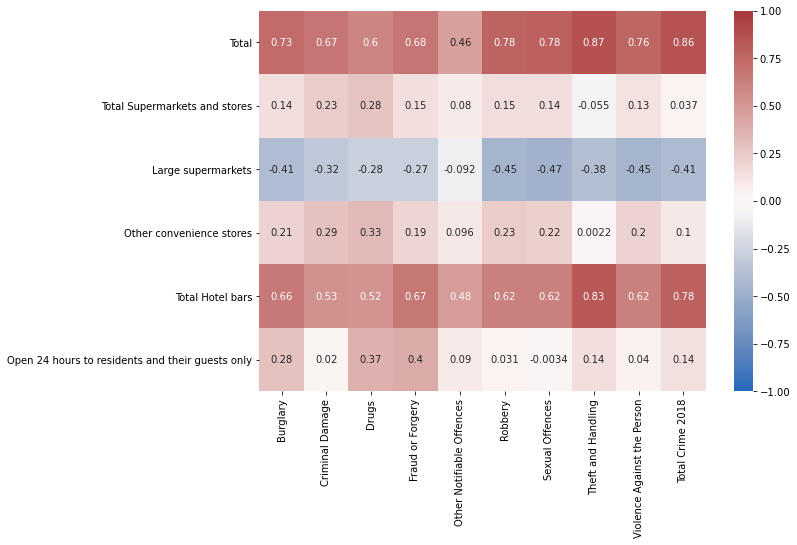

In [64]:
#in this palette stronger the colour the stronger the correlation, reds for positive, blue for negative


fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(heat_map, annot=True, cmap="vlag", vmin=-1, vmax=1)

plt.show()

This suggests there is overall strong correlation between crime and venues with a 24 hour alcohol licence. Hotel bars have the strongest link to crime, and there is some suggestion large supermarkets may decrease crime.

Repeat for minor crime classifications

In [65]:
adjMinorCrimeLicense.head()

,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH,Total Crime 2018,Total,Total Supermarkets and stores,Large supermarkets,Other convenience stores,Total Hotel bars,Open 24 hours to residents and their guests only
Borough,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,68.086120,30.095694,61.435406,2.727273,80.239235,0.0,15.358851,30.143541,4.162679,2.966507,...,60.669857,9.712918,30.478468,870.66990,0.143541,0.143541,0.047847,0.095694,0.000000,0.000000
Barnet,39.810062,39.014374,74.743324,1.745380,56.160164,0.0,10.087269,21.201233,4.132443,2.464066,...,39.373720,4.491786,16.555440,725.05133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bexley,46.090874,24.109701,56.406055,2.251330,54.441260,0.0,13.589849,28.039293,5.075727,1.146132,...,31.764225,4.748260,18.870241,627.42530,0.163733,0.163733,0.040933,0.122800,0.000000,0.000000
Brent,61.276726,36.826256,75.188194,3.432701,98.614876,0.0,14.754592,22.613670,6.564288,4.125264,...,44.534780,10.237880,33.333332,924.90220,1.385125,0.843120,0.120446,0.722674,0.090334,0.000000
Bromley,46.477585,29.673681,66.758156,2.104300,58.401950,0.0,13.815187,23.940226,5.672461,1.158890,...,27.447393,6.556877,18.664227,707.77673,0.426959,0.335468,0.121988,0.213480,0.091491,0.091491


In [66]:
adjMinorCrimeLicense.corr()

,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH,Total Crime 2018,Total,Total Supermarkets and stores,Large supermarkets,Other convenience stores,Total Hotel bars,Open 24 hours to residents and their guests only
Assault with Injury,1.000000,0.700761,0.334420,0.792724,0.918572,NaN,0.674137,0.450194,0.803104,0.655830,...,0.152239,0.494136,0.946804,0.837898,0.644034,0.178843,-0.472338,0.256017,0.474184,-0.086465
Burglary in Other Buildings,0.700761,1.000000,0.467274,0.710766,0.840361,NaN,0.230738,0.208529,0.935049,0.363047,...,-0.061019,0.623003,0.722287,0.958606,0.821732,-0.039445,-0.350256,0.013871,0.800275,0.217366
Burglary in a Dwelling,0.334420,0.467274,1.000000,0.619521,0.433477,NaN,0.401376,-0.244719,0.408643,0.513385,...,0.188652,0.427781,0.501500,0.457350,0.319438,0.393713,-0.351896,0.457129,0.196635,0.288226
Business Property,0.792724,0.710766,0.619521,1.000000,0.786619,NaN,0.631670,0.068329,0.775939,0.567322,...,0.149573,0.489919,0.847852,0.803351,0.561938,0.247006,-0.552147,0.338082,0.397615,0.035461
Common Assault,0.918572,0.840361,0.433477,0.786619,1.000000,NaN,0.516473,0.303394,0.877676,0.632520,...,0.098822,0.555385,0.935761,0.935491,0.762196,0.060804,-0.406129,0.125047,0.650917,0.047019
Counted per Victim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Criminal Damage To Dwelling,0.674137,0.230738,0.401376,0.631670,0.516473,NaN,1.000000,0.309947,0.370046,0.720072,...,0.191227,0.245508,0.696284,0.394910,0.222037,0.415529,-0.375395,0.483078,0.055368,0.105083
Criminal Damage To Motor Vehicle,0.450194,0.208529,-0.244719,0.068329,0.303394,NaN,0.309947,1.000000,0.245306,0.120805,...,0.227507,-0.090557,0.288533,0.288807,0.394231,0.072076,0.069240,0.062998,0.380020,-0.001156
Criminal Damage To Other Building,0.803104,0.935049,0.408643,0.775939,0.877676,NaN,0.370046,0.245306,1.000000,0.416872,...,-0.173053,0.657534,0.812546,0.949646,0.814525,0.035608,-0.421925,0.101723,0.712514,0.070154
Drug Trafficking,0.655830,0.363047,0.513385,0.567322,0.632520,NaN,0.720072,0.120805,0.416872,1.000000,...,0.239271,0.350122,0.729497,0.464645,0.242452,0.451926,-0.310093,0.510195,0.026162,-0.010623


In [67]:

#pull out the data we are interested in - impact of venues on crimes
heat_map_minor =adjMinorCrimeLicense.corr().loc[ adjAllNightLicense.columns,historicCrimeByBoroughMinor.columns]
heat_map_minor

,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH,Total Crime 2018
Total,0.644034,0.821732,0.319438,0.561938,0.762196,NaN,0.222037,0.394231,0.814525,0.242452,...,0.593844,0.784942,0.612013,0.681841,0.620345,0.788678,-0.081431,0.427893,0.683240,0.862002
Total Supermarkets and stores,0.178843,-0.039445,0.393713,0.247006,0.060804,NaN,0.415529,0.072076,0.035608,0.451926,...,0.164114,0.149516,0.256771,0.117749,0.189254,-0.202127,0.071602,0.059020,0.297561,0.036593
Large supermarkets,-0.472338,-0.350256,-0.351896,-0.552147,-0.406129,NaN,-0.375395,0.069240,-0.421925,-0.310093,...,-0.386848,-0.440600,-0.271671,-0.513822,-0.143764,-0.278131,-0.036563,-0.323664,-0.434267,-0.410696
Other convenience stores,0.256017,0.013871,0.457129,0.338082,0.125047,NaN,0.483078,0.062998,0.101723,0.510195,...,0.227720,0.221110,0.304657,0.199954,0.215808,-0.163673,0.078889,0.110458,0.371541,0.100992
Total Hotel bars,0.474184,0.800275,0.196635,0.397615,0.650917,NaN,0.055368,0.380020,0.712514,0.026162,...,0.397964,0.628558,0.548815,0.522072,0.623068,0.824937,-0.124702,0.440546,0.472016,0.784860
Open 24 hours to residents and their guests only,-0.086465,0.217366,0.288226,0.035461,0.047019,NaN,0.105083,-0.001156,0.070154,-0.010623,...,-0.192464,0.030999,0.389587,-0.065283,0.350634,0.168784,-0.111024,0.373006,-0.024621,0.139945


In [68]:
heat_map_minor.dropna(axis=1, inplace=True)

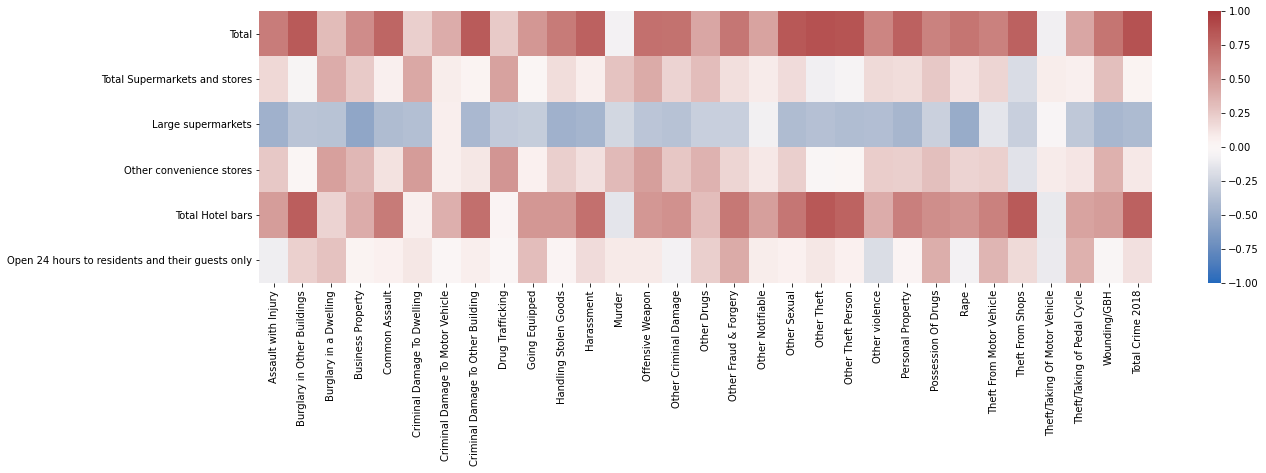

In [96]:
#in this palette stronger the colour the stronger the correlation, reds for positive, blue for negative

fig_dims = (20,5)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(heat_map_minor, annot=False, cmap="vlag", vmin=-1, vmax=1)

plt.show()

In [ ]:
# Additional Plots Guided by Correlation Results

The correlation coefficients indicate if there is a linear relationship, not how strong this relationship is. To invesitigate this conduct further plots

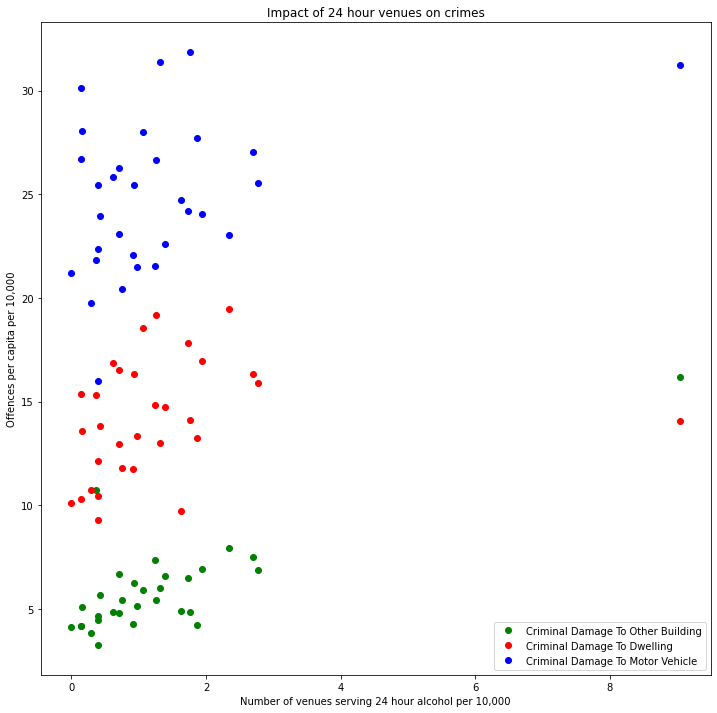

In [70]:
#granularPlotData =granularPlotData*10000

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Criminal Damage To Other Building'],'o', color='green', label='Criminal Damage To Other Building')
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Criminal Damage To Dwelling'],'o', color='red', label='Criminal Damage To Dwelling')
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Criminal Damage To Motor Vehicle'],'o', color='blue', label='Criminal Damage To Motor Vehicle')
plt.title("Impact of 24 hour venues on crimes")
plt.xlabel("Number of venues serving 24 hour alcohol per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

This suggests a trend between venues and criminal damage. To help understand, plot best fit lines.

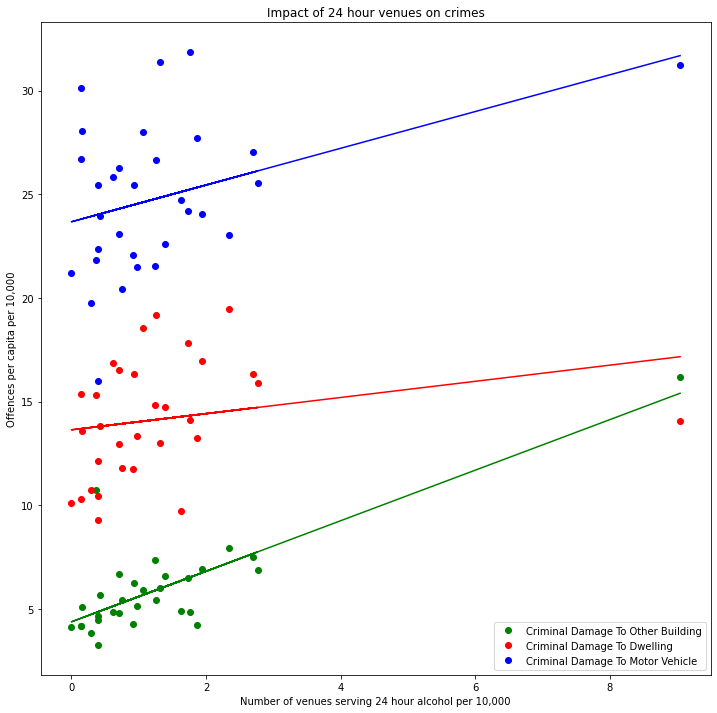

In [71]:

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Criminal Damage To Other Building'],'o', color='green', label='Criminal Damage To Other Building')
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Criminal Damage To Dwelling'],'o', color='red', label='Criminal Damage To Dwelling')
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Criminal Damage To Motor Vehicle'],'o', color='blue', label='Criminal Damage To Motor Vehicle')
plt.title("Impact of 24 hour venues on crimes")
plt.xlabel("Number of venues serving 24 hour alcohol per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

x=adjMinorCrimeLicense['Total']
y1=adjMinorCrimeLicense['Criminal Damage To Other Building']
y2=adjMinorCrimeLicense['Criminal Damage To Dwelling']
y3=adjMinorCrimeLicense['Criminal Damage To Motor Vehicle']


m, b = np. polyfit(x, y1, 1) #m = slope, b = intercept.
plt.plot(x, m*x + b, color='green') # add line of best fit.

m, b = np. polyfit(x, y2, 1) #m = slope, b = intercept.
plt.plot(x, m*x + b, color='red') # add line of best fit.

m, b = np. polyfit(x, y3, 1) #m = slope, b = intercept.
plt.plot(x, m*x + b, color='blue') # add line of best fit.

As indicated on the correlation matrix, criminal damage to other building, fits best to the line.

Next let's look at one of the suggested negative correlations

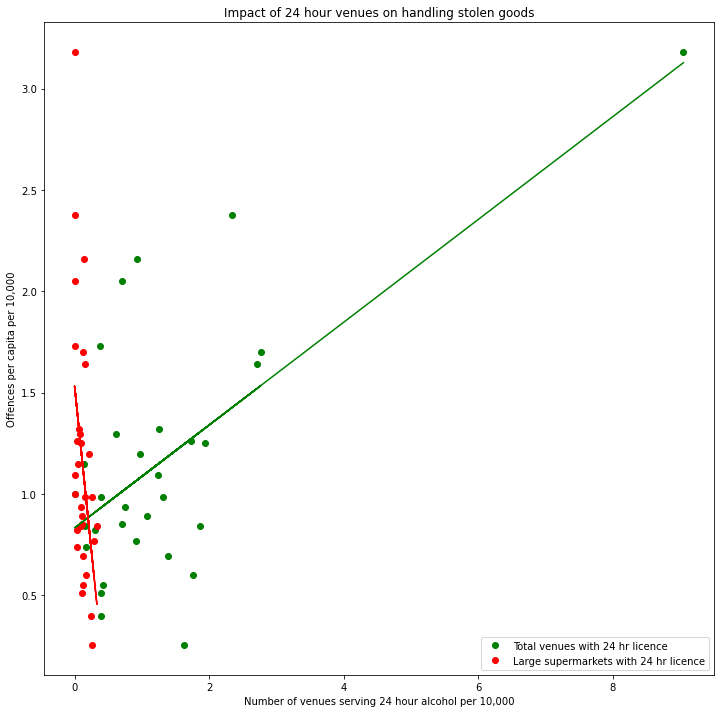

In [52]:

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Handling Stolen Goods'],'o', color='green', label= "Total venues with 24 hr licence")
plt.plot(adjMinorCrimeLicense['Large supermarkets'],adjMinorCrimeLicense['Handling Stolen Goods'],'o', color='red', label = "Large supermarkets with 24 hr licence")
#plt.plot(granularPlotData['Total Hotel bars adj'],granularPlotData['Handling Stolen Goods adj'],'o', color='blue')
plt.title("Impact of 24 hour venues on handling stolen goods")
plt.xlabel("Number of venues serving 24 hour alcohol per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

x1=adjMinorCrimeLicense['Total']
x2=adjMinorCrimeLicense['Large supermarkets']
y=adjMinorCrimeLicense['Handling Stolen Goods']


m, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m*x1 + b, color='green') # add line of best fit.

m, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m*x2 + b, color='red') # add line of best fit.



This is a bit squashed, let's look just at Large supermarkets

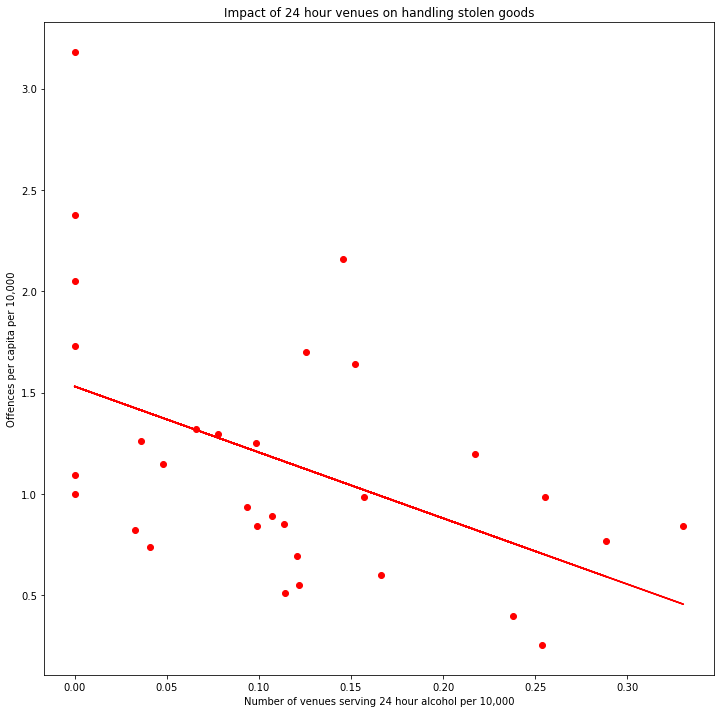

In [48]:
plt.rcParams["figure.figsize"] = (12,12)
#plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Handling Stolen Goods'],'o', color='green')
plt.plot(adjMinorCrimeLicense['Large supermarkets'],adjMinorCrimeLicense['Handling Stolen Goods'],'o', color='red')
#plt.plot(granularPlotData['Total Hotel bars adj'],granularPlotData['Handling Stolen Goods adj'],'o', color='blue')
plt.title("Impact of 24 hour venues on handling stolen goods")
plt.xlabel("Number of venues serving 24 hour alcohol per 10,000")
plt.ylabel("Offences per capita per 10,000")


x1=adjMinorCrimeLicense['Total']
x2=adjMinorCrimeLicense['Large supermarkets']
y=adjMinorCrimeLicense['Handling Stolen Goods']


m, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
#plt.plot(x, m*x + b, color='green') # add line of best fit.

m, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m*x2 + b, color='red') # add line of best fit.

As indicated in the correlation matrix, there is some indication of negative correlation, but not a good fit


Next look at burglary in other buildings

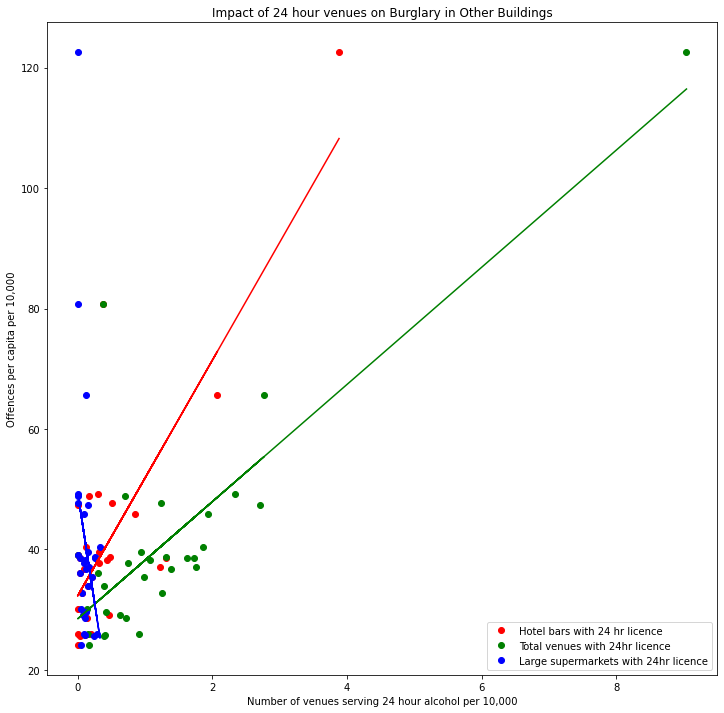

In [74]:

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLicense['Total Hotel bars'],adjMinorCrimeLicense['Burglary in Other Buildings'],'o', color='red', label = "Hotel bars with 24 hr licence")
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Burglary in Other Buildings'],'o', color='green', label='Total venues with 24hr licence')
plt.plot(adjMinorCrimeLicense['Large supermarkets'],adjMinorCrimeLicense['Burglary in Other Buildings'],'o', color='blue', label='Large supermarkets with 24hr licence')
plt.title("Impact of 24 hour venues on Burglary in Other Buildings")
plt.xlabel("Number of venues serving 24 hour alcohol per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

x1=adjMinorCrimeLicense['Total']
x2=adjMinorCrimeLicense['Total Hotel bars']
x3=adjMinorCrimeLicense['Large supermarkets']
y=adjMinorCrimeLicense['Burglary in Other Buildings']


m, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x, m*x + b, color='green') # add line of best fit.

m, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m*x2 + b, color='red') # add line of best fit.


m, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
plt.plot(x3, m*x3 + b, color='blue') # add line of best fit.

This shows how hotel bars have more impact on crime than 24 licenced venues in general

# Reduced Correlation Matrix

Reduce this to only crimes where there is evidence of strong correlation (+/- 0.7)

In [55]:
colsStrongPos = heat_map_minor[heat_map_minor>0.7].dropna(how='all', axis=1).columns
colsStrongNeg = heat_map_minor[heat_map_minor<-0.7].dropna(how='all', axis=1).columns

heat_map_minor[list(set(list(colsStrongPos) +list(colsStrongNeg))) ] # combine lists but convert to set and back to remove duplicates

,Other Theft Person,Total Crime 2018,Other Criminal Damage,Theft From Shops,Burglary in Other Buildings,Other Sexual,Personal Property,Criminal Damage To Other Building,Offensive Weapon,Other Theft,Common Assault,Harassment
Total,0.852357,0.862002,0.702558,0.788678,0.821732,0.831994,0.784942,0.814525,0.710755,0.874800,0.762196,0.787416
Total Supermarkets and stores,-0.054010,0.036593,0.200470,-0.202127,-0.039445,0.157709,0.149516,0.035608,0.402294,-0.080617,0.060804,0.064332
Large supermarkets,-0.391680,-0.410696,-0.362416,-0.278131,-0.350256,-0.400332,-0.440600,-0.421925,-0.336613,-0.369389,-0.406129,-0.446134
Other convenience stores,0.005387,0.100992,0.261121,-0.163673,0.013871,0.223257,0.221110,0.101723,0.463539,-0.025276,0.125047,0.134846
Total Hotel bars,0.777552,0.784860,0.534390,0.824937,0.800275,0.677835,0.628558,0.712514,0.506582,0.832144,0.650917,0.705053
Open 24 hours to residents and their guests only,0.049784,0.139945,-0.069993,0.168784,0.217366,0.051030,0.030999,0.070154,0.087259,0.105304,0.047019,0.158603


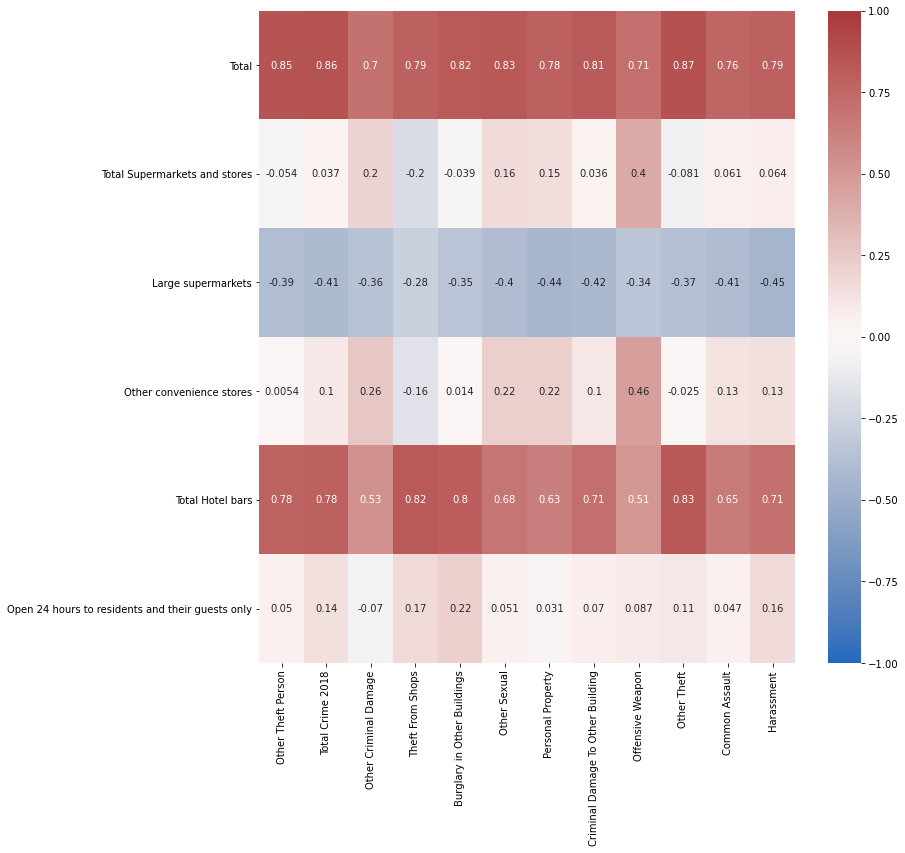

In [56]:
#in this palette stronger the colour the stronger the correlation, reds for positive, blue for negative


fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(heat_map_minor[list(set(list(colsStrongPos) +list(colsStrongNeg))) ] , annot=True, cmap="vlag", vmin=-1, vmax=1)

plt.show()

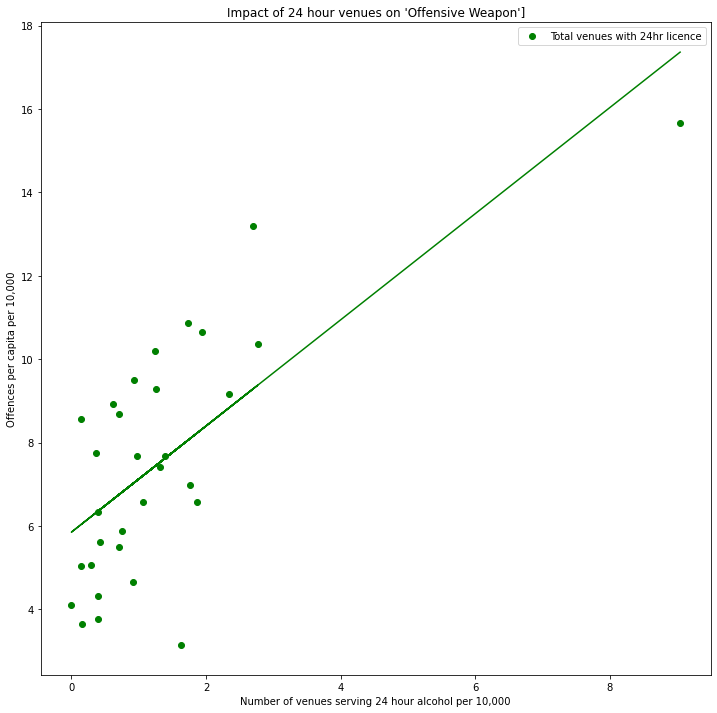

In [78]:

plt.rcParams["figure.figsize"] = (12,12)
#plt.plot(adjMinorCrimeLicense['Total Hotel bars'],adjMinorCrimeLicense['Offensive Weapon'],'o', color='red', label = "Hotel bars with 24 hr licence")
plt.plot(adjMinorCrimeLicense['Total'],adjMinorCrimeLicense['Offensive Weapon'],'o', color='green', label='Total venues with 24hr licence')
#plt.plot(adjMinorCrimeLicense['Large supermarkets'],adjMinorCrimeLicense['Offensive Weapon'],'o', color='blue', label='Large supermarkets with 24hr licence')
plt.title("Impact of 24 hour venues on 'Offensive Weapon']")
plt.xlabel("Number of venues serving 24 hour alcohol per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

x1=adjMinorCrimeLicense['Total']
x2=adjMinorCrimeLicense['Total Hotel bars']
x3=adjMinorCrimeLicense['Large supermarkets']
y=adjMinorCrimeLicense['Offensive Weapon']


m, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x, m*x + b, color='green') # add line of best fit.

m, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
#plt.plot(x2, m*x2 + b, color='red') # add line of best fit.


m, b = np. polyfit(x3, y, 1) #m = slope, b = intercept.
#plt.plot(x3, m*x3 + b, color='blue') # add line of best fit.

This looks like good correlation, but is it distorted by Wesminster, the outlier?


Look at harassment which appeared to have some positive and some negative correlation

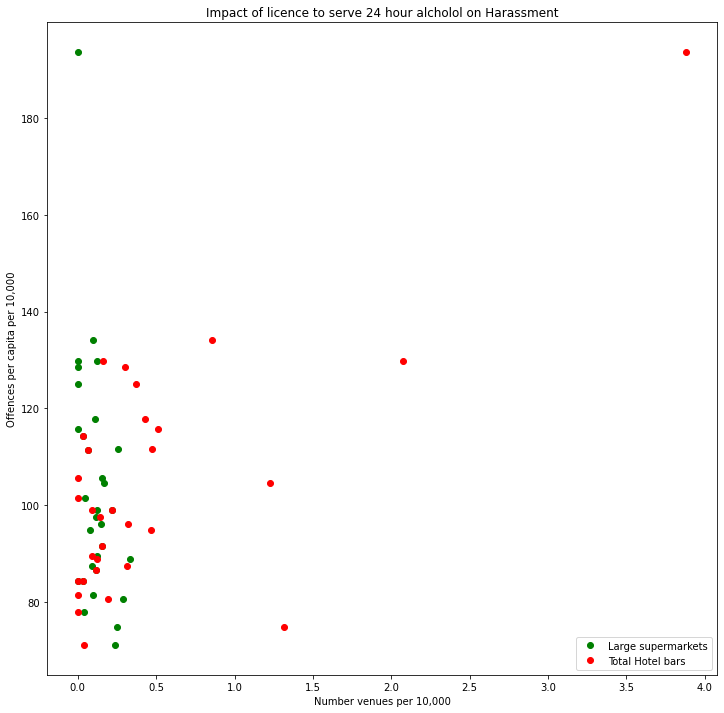

In [97]:
industry1 = 'Large supermarkets'
industry2 = 'Total Hotel bars'

crime = 'Harassment'


plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLicense[industry1],adjMinorCrimeLicense[crime],'o', color='green', label= industry1)
plt.plot(adjMinorCrimeLicense[industry2],adjMinorCrimeLicense[crime],'o', color='red', label = industry2)

plt.title("Impact of licence to serve 24 hour alcholol on " + crime)
plt.xlabel("Number venues per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=adjMinorCrimeLicense[industry1]
x2=adjMinorCrimeLicense[industry2]
y=adjMinorCrimeLicense[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
#plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
#plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.


Look at a variety of crimes against total number of 24 hour licenced venues

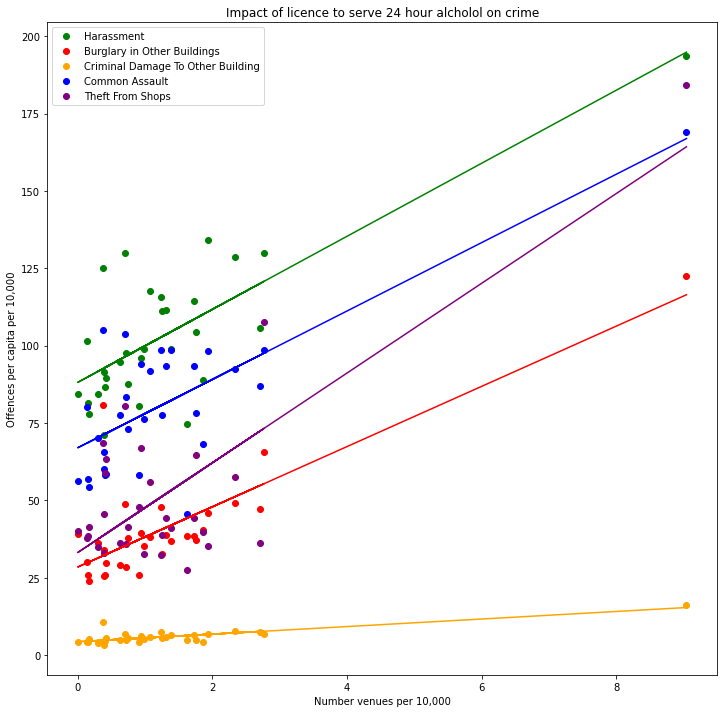

In [85]:
industry1 = 'Total'
crime1 = 'Harassment'
crime2 = 'Burglary in Other Buildings'
crime3 = 'Criminal Damage To Other Building'
crime4 = 'Common Assault'
crime5 = 'Theft From Shops'

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(adjMinorCrimeLicense[industry1],adjMinorCrimeLicense[crime1],'o', color='green', label= crime1)
plt.plot(adjMinorCrimeLicense[industry1],adjMinorCrimeLicense[crime2],'o', color='red', label = crime2)
plt.plot(adjMinorCrimeLicense[industry1],adjMinorCrimeLicense[crime3],'o', color='orange', label = crime3)
plt.plot(adjMinorCrimeLicense[industry1],adjMinorCrimeLicense[crime4],'o', color='blue', label = crime4)
plt.plot(adjMinorCrimeLicense[industry1],adjMinorCrimeLicense[crime5],'o', color='purple', label = crime5)

plt.title("Impact of licence to serve 24 hour alcholol on crime")
plt.xlabel("Number venues per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=adjMinorCrimeLicense[industry1]
y1=adjMinorCrimeLicense[crime1]
y2=adjMinorCrimeLicense[crime2]
y3=adjMinorCrimeLicense[crime3]
y4=adjMinorCrimeLicense[crime4]
y5=adjMinorCrimeLicense[crime5]

m1, b = np. polyfit(x1, y1, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x1, y2, 1) #m = slope, b = intercept.
plt.plot(x1, m2*x1 + b, color='red') # add line of best fit.

                        
m3, b = np. polyfit(x1, y3, 1) #m = slope, b = intercept.
plt.plot(x1, m3*x1 + b, color='orange') # add line of best fit.

m4, b = np. polyfit(x1, y4, 1) #m = slope, b = intercept.
plt.plot(x1, m4*x1 + b, color='blue') # add line of best fit.
  

m5, b = np. polyfit(x1, y5, 1) #m = slope, b = intercept.
plt.plot(x1, m5*x1 + b, color='purple') # add line of best fit.
   
                        

This looks like a good fit but is westminster the outlier distoring?

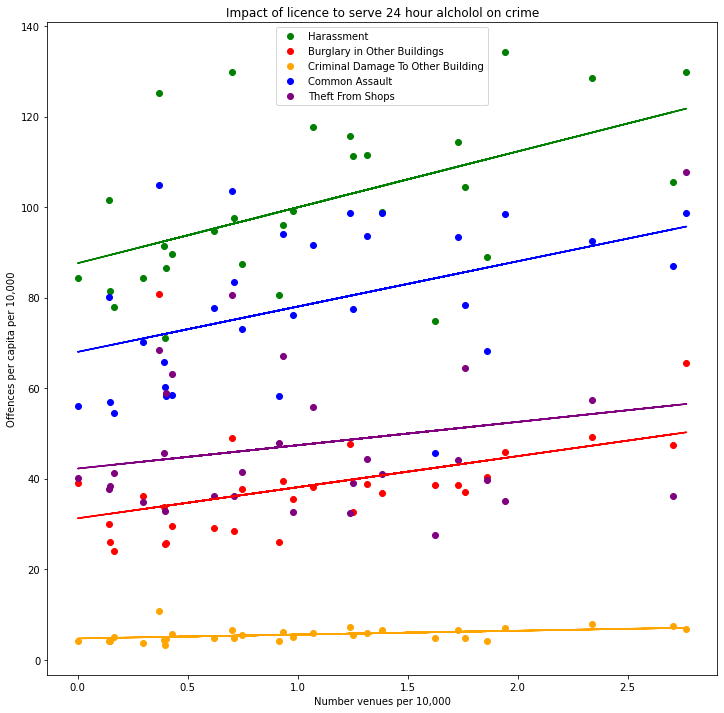

In [86]:
plotData = adjMinorCrimeLicense.drop('Westminster')

industry1 = 'Total'
crime1 = 'Harassment'
crime2 = 'Burglary in Other Buildings'
crime3 = 'Criminal Damage To Other Building'
crime4 = 'Common Assault'
crime5 = 'Theft From Shops'

plt.rcParams["figure.figsize"] = (12,12)
plt.plot(plotData[industry1],plotData[crime1],'o', color='green', label= crime1)
plt.plot(plotData[industry1],plotData[crime2],'o', color='red', label = crime2)
plt.plot(plotData[industry1],plotData[crime3],'o', color='orange', label = crime3)
plt.plot(plotData[industry1],plotData[crime4],'o', color='blue', label = crime4)
plt.plot(plotData[industry1],plotData[crime5],'o', color='purple', label = crime5)

plt.title("Impact of licence to serve 24 hour alcholol on crime")
plt.xlabel("Number venues per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=plotData[industry1]
y1=plotData[crime1]
y2=plotData[crime2]
y3=plotData[crime3]
y4=plotData[crime4]
y5=plotData[crime5]

m1, b = np. polyfit(x1, y1, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x1, y2, 1) #m = slope, b = intercept.
plt.plot(x1, m2*x1 + b, color='red') # add line of best fit.

                        
m3, b = np. polyfit(x1, y3, 1) #m = slope, b = intercept.
plt.plot(x1, m3*x1 + b, color='orange') # add line of best fit.

m4, b = np. polyfit(x1, y4, 1) #m = slope, b = intercept.
plt.plot(x1, m4*x1 + b, color='blue') # add line of best fit.
  

m5, b = np. polyfit(x1, y5, 1) #m = slope, b = intercept.
plt.plot(x1, m5*x1 + b, color='purple') # add line of best fit.
   
     


THe evidence looks less strong with Westminster removed

## Repeat Correlation Analysis without Westminster

In [88]:
plotData.corr().loc[ adjAllNightLicense.columns,colsStrongPos]

,Burglary in Other Buildings,Common Assault,Criminal Damage To Other Building,Harassment,Offensive Weapon,Other Criminal Damage,Other Sexual,Other Theft,Other Theft Person,Personal Property,Theft From Shops,Total Crime 2018
Total,0.436864,0.445234,0.423625,0.528337,0.630393,0.410217,0.542441,0.429779,0.341032,0.437476,0.229337,0.542218
Total Supermarkets and stores,0.160528,0.255280,0.279361,0.257826,0.585984,0.402784,0.444850,0.157196,0.208512,0.410732,-0.104979,0.302351
Large supermarkets,-0.285128,-0.353983,-0.401926,-0.410001,-0.262585,-0.289861,-0.357363,-0.367760,-0.410716,-0.412531,-0.164606,-0.393929
Other convenience stores,0.206768,0.313669,0.345474,0.324791,0.636256,0.453996,0.507080,0.215962,0.274720,0.480765,-0.081753,0.367649
Total Hotel bars,0.451035,0.213693,0.218482,0.347473,0.170818,0.061153,0.178385,0.427196,0.239995,0.094536,0.476464,0.382886
Open 24 hours to residents and their guests only,0.501256,0.176232,0.257485,0.329407,0.173055,0.002190,0.209548,0.440279,0.314456,0.168674,0.465448,0.393543


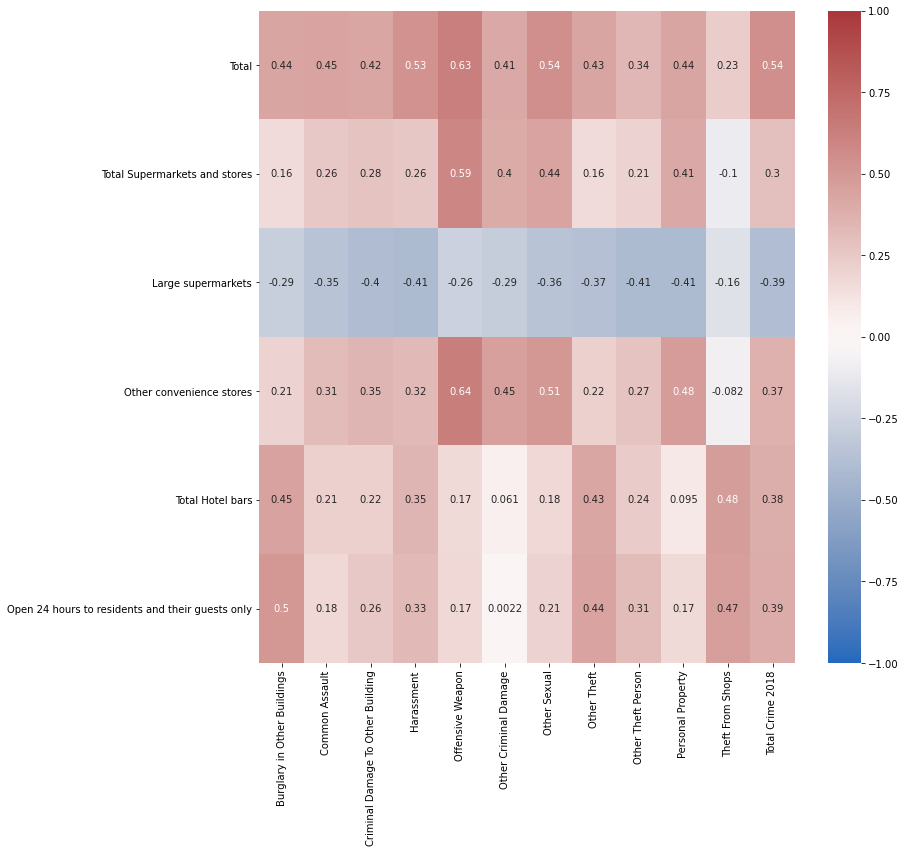

In [90]:
fig_dims = (12,12)
fig, ax = plt.subplots(figsize=fig_dims)

sn.color_palette("vlag", as_cmap=True)
sn.heatmap(plotData.corr().loc[ adjAllNightLicense.columns,colsStrongPos] , annot=True, cmap="vlag", vmin=-1, vmax=1)

plt.show()

Offensive weapon has strongest correlation - let's have a look

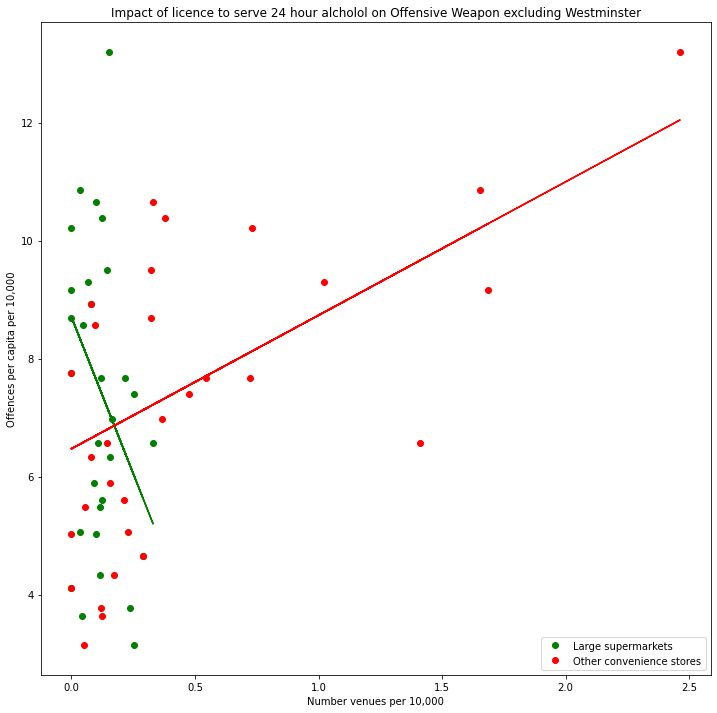

In [94]:
industry1 = 'Large supermarkets'
industry2 = 'Other convenience stores'

crime = 'Offensive Weapon'


plt.rcParams["figure.figsize"] = (12,12)
plt.plot(plotData[industry1],plotData[crime],'o', color='green', label= industry1)
plt.plot(plotData[industry2],plotData[crime],'o', color='red', label = industry2)

plt.title("Impact of licence to serve 24 hour alcholol on " + crime + " excluding Westminster")
plt.xlabel("Number venues per 10,000")
plt.ylabel("Offences per capita per 10,000")
plt.legend()

#calculate and plot simple lines of best fit
x1=adjMinorCrimeLicense[industry1]
x2=adjMinorCrimeLicense[industry2]
y=adjMinorCrimeLicense[crime]

m1, b = np. polyfit(x1, y, 1) #m = slope, b = intercept.
plt.plot(x1, m1*x1 + b, color='green') # add line of best fit.

m2, b = np. polyfit(x2, y, 1) #m = slope, b = intercept.
plt.plot(x2, m2*x2 + b, color='red') # add line of best fit.
